<a href="https://colab.research.google.com/github/lailaesa/Lailaesa_Portfolio/blob/main/Adidas%20Retail%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adidas = pd.read_csv('adidas.csv')
print(adidas.head())
print(adidas.info())

                                                 url  \
0  https://www.adidas.com/us/beach-shorts/FJ5089....   
1  https://www.adidas.com/us/five-ten-kestrel-lac...   
2  https://www.adidas.com/us/mexico-away-jersey/G...   
3  https://www.adidas.com/us/five-ten-hiangle-pro...   
4  https://www.adidas.com/us/mesh-broken-stripe-p...   

                                              name     sku  selling_price  \
0                                     Beach Shorts  FJ5089             40   
1        Five Ten Kestrel Lace Mountain Bike Shoes  BC0770            150   
2                               Mexico Away Jersey  GC7946             70   
3  Five Ten Hiangle Pro Competition Climbing Shoes  FV4744            160   
4                    Mesh Broken-Stripe Polo Shirt  GM0239             65   

  original_price currency availability  color  category                source  \
0            NaN      USD      InStock  Black  Clothing  adidas United States   
1            NaN      USD      InStock

In [197]:
print(adidas.isnull().sum())

url                0
name               0
sku                0
selling_price      0
original_price    16
currency           0
availability       0
color              0
category           0
source             0
source_website     0
breadcrumbs        0
description        0
brand              0
images             0
country            0
language           0
average_rating     0
reviews_count      0
crawled_at         0
dtype: int64


In [198]:
adidas['original_price'] = adidas['original_price'].str.replace("$"," ")
print(adidas)

                                                   url  \
0    https://www.adidas.com/us/beach-shorts/FJ5089....   
1    https://www.adidas.com/us/five-ten-kestrel-lac...   
2    https://www.adidas.com/us/mexico-away-jersey/G...   
3    https://www.adidas.com/us/five-ten-hiangle-pro...   
4    https://www.adidas.com/us/mesh-broken-stripe-p...   
..                                                 ...   
840  https://www.adidas.com/us/supernova-plus-shoes...   
841  https://www.adidas.com/us/choigo-shoes/H00667....   
842  https://www.adidas.com/us/daily-3.0-shoes/GZ77...   
843  https://www.adidas.com/us/daily-3.0-shoes/GZ77...   
844  https://www.adidas.com/us/choigo-shoes/FY6503....   

                                                name     sku  selling_price  \
0                                       Beach Shorts  FJ5089             40   
1          Five Ten Kestrel Lace Mountain Bike Shoes  BC0770            150   
2                                 Mexico Away Jersey  GC7946      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [199]:
avg_norm_loss = adidas["original_price"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 69.00844390832329


In [200]:
adidas["original_price"].replace(np.nan, avg_norm_loss, inplace=True)
print(adidas.isnull().sum())

url               0
name              0
sku               0
selling_price     0
original_price    0
currency          0
availability      0
color             0
category          0
source            0
source_website    0
breadcrumbs       0
description       0
brand             0
images            0
country           0
language          0
average_rating    0
reviews_count     0
crawled_at        0
dtype: int64


In [201]:
adidas['Category'] = adidas['breadcrumbs'].str.split("/")
adidas['Category'] = adidas['Category'].str[0]
adidas['type'] = adidas['breadcrumbs'].str.split("/")
adidas['type'] = adidas['type'].str[1]
print(adidas)

                                                   url  \
0    https://www.adidas.com/us/beach-shorts/FJ5089....   
1    https://www.adidas.com/us/five-ten-kestrel-lac...   
2    https://www.adidas.com/us/mexico-away-jersey/G...   
3    https://www.adidas.com/us/five-ten-hiangle-pro...   
4    https://www.adidas.com/us/mesh-broken-stripe-p...   
..                                                 ...   
840  https://www.adidas.com/us/supernova-plus-shoes...   
841  https://www.adidas.com/us/choigo-shoes/H00667....   
842  https://www.adidas.com/us/daily-3.0-shoes/GZ77...   
843  https://www.adidas.com/us/daily-3.0-shoes/GZ77...   
844  https://www.adidas.com/us/choigo-shoes/FY6503....   

                                                name     sku  selling_price  \
0                                       Beach Shorts  FJ5089             40   
1          Five Ten Kestrel Lace Mountain Bike Shoes  BC0770            150   
2                                 Mexico Away Jersey  GC7946      

In [202]:
adidas['original_price'] = adidas['original_price'].astype("float")
adidas.dtypes

url                object
name               object
sku                object
selling_price       int64
original_price    float64
currency           object
availability       object
color              object
category           object
source             object
source_website     object
breadcrumbs        object
description        object
brand              object
images             object
country            object
language           object
average_rating    float64
reviews_count       int64
crawled_at         object
Category           object
type               object
dtype: object

In [203]:
adidas.describe()

,selling_price,original_price,average_rating,reviews_count
count,845.000000,845.000000,845.000000,845.000000
mean,53.192899,69.008444,4.608402,426.178698
std,31.411645,40.104498,0.293795,1229.158277
min,9.000000,14.000000,1.000000,1.000000
25%,28.000000,40.000000,4.500000,19.000000
50%,48.000000,65.000000,4.700000,68.000000
75%,70.000000,90.000000,4.800000,314.000000
max,240.000000,300.000000,5.000000,11750.000000


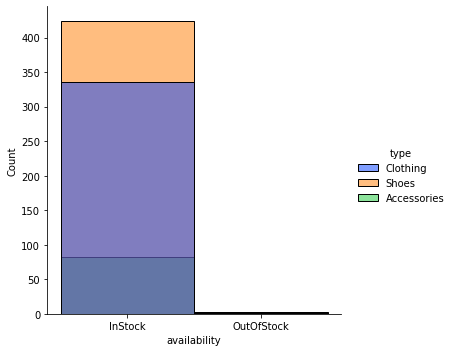

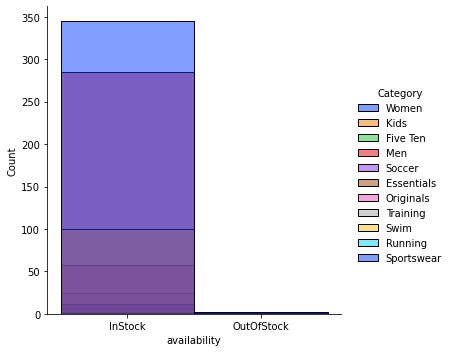

In [204]:
sns.displot(adidas, x="availability", hue="type", palette='bright')
sns.displot(adidas, x="availability", hue="Category", palette='bright')

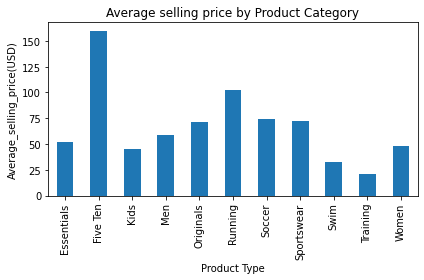

In [211]:
category_by_average_rating = adidas.groupby(['Category'])['selling_price'].mean()
category_by_average_rating.plot(x='Category', y ='selling_price',kind='bar', title ='Average selling price by Product Category')
plt.xlabel('Product Type')
plt.ylabel('Average_selling_price(USD)')
plt.tight_layout()
plt.show()


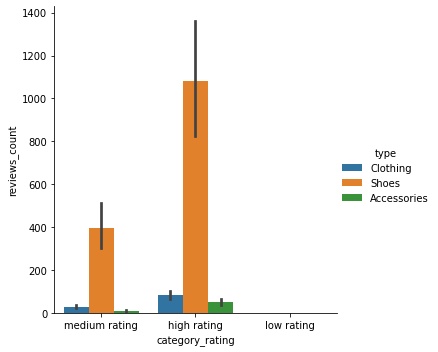

In [212]:
def func(row):
    if row['average_rating'] == 1 and  row['average_rating']<=3.5 :
        val = 'low rating'
    elif (row['average_rating'] >3.5 and row['average_rating']<=4.5):
        val ='medium rating'
    else:
        val ='high rating'
    return val
adidas['category_rating'] = adidas.apply(func, axis=1)
sns.catplot(data=adidas, x="category_rating", y="reviews_count", hue="type", kind="bar")

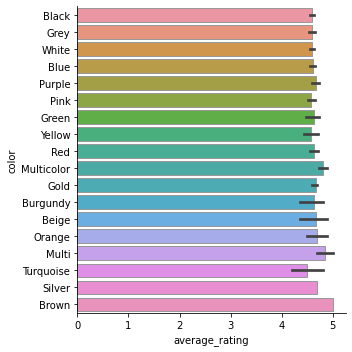

In [207]:
sns.catplot(data=adidas, x="average_rating", y="color", kind="bar", edgecolor=".6")

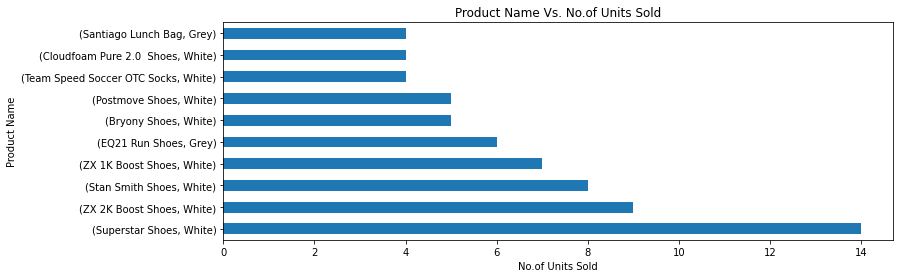

In [208]:
plt.figure(figsize=(12,4))
adidas[['name', 'color']].value_counts()[:10].plot(kind='barh')
plt.ylabel("Product Name")
plt.xlabel("No.of Units Sold")
plt.title("Product Name Vs. No.of Units Sold")
plt.show();


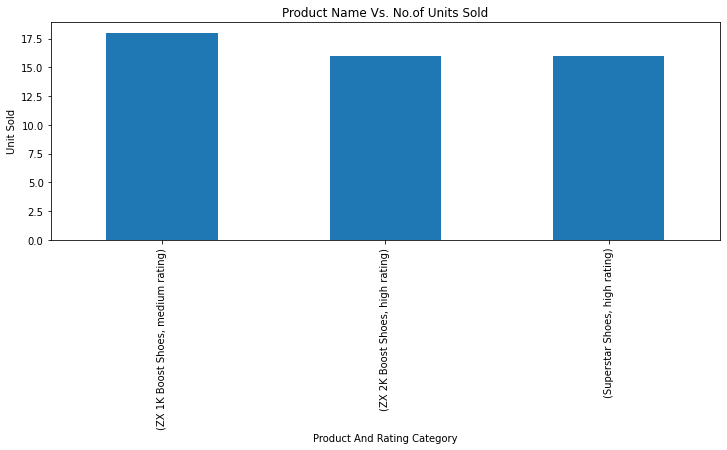

In [209]:
plt.figure(figsize=(12,4))
adidas[['name','category_rating']].value_counts()[:3].plot(kind='bar')
plt.ylabel("Unit Sold")
plt.xlabel("Product And Rating Category")
plt.title("Product Name Vs. No.of Units Sold")
plt.show();

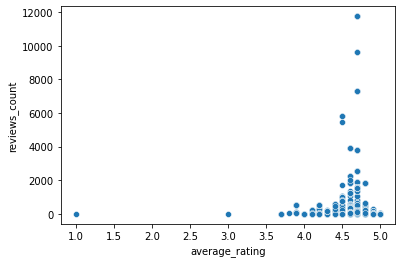

In [210]:
sns.scatterplot(data=adidas, x='average_rating', y='reviews_count')